In [571]:
import warnings
warnings.filterwarnings('ignore')

In [572]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns',500)

In [573]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')


In [574]:
churn_data.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [575]:
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [576]:
internet_data.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [577]:
merge1 = pd.merge(churn_data,customer_data,how ='inner',on ='customerID')

In [578]:
merge1.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No


In [579]:
telecom = pd.merge(merge1,internet_data,how='inner',on='customerID')
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


### 2. EDA on the telecom data

In [580]:
telecom.describe(percentiles = [.20,.25,.50,.70,.85,.95]).T

,count,mean,std,min,20%,25%,50%,70%,85%,95%,max
tenure,7043.0,32.371149,24.559481,0.00,6.00,9.0,29.00,50.0,65.00,72.0,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,25.05,35.5,70.35,85.5,98.55,107.4,118.75
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.0,0.00,0.0,1.00,1.0,1.00


### 3. Preparing the data before modeling

#### Checking the data types of variables

In [581]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

<b>Inference:</b> `TotalCharges` is of type `object`. Analysis shows that it should be of type `float`
    Lets change the datatype

In [582]:
round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [583]:
#telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [584]:
telecom[~(telecom['TotalCharges'] == " ")].count(axis=0)

customerID          7032
tenure              7032
PhoneService        7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
dtype: int64

<b>We notice that there are 11 rows with missing `TotalCharges`

In [585]:
#deleting the missing values rows
telecom = telecom[~(telecom['TotalCharges'] == " ")]

In [586]:
telecom.shape

(7032, 21)

In [587]:
#lets try converting the column to float again
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'])

In [588]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
dtypes: float64(2), int64(2), ob

In [589]:
#dropping customerID now as it will be needed
telecom.drop('customerID',axis=1,inplace =True)

## Handling categorical variables 

####  Creating dummy variables for Categorical Variables

In [590]:
telecom.columns

Index(['tenure', 'PhoneService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'],
      dtype='object')


<b> The very first step in data preparation is to convert all the columns values to numeric values. The numeric values help in performing operations and creating models. </b>
    
As all the categorical variables are of type `object` and therefore, the conversions needs to be done on the following:
   - Yes/No categorical columns
   - Muliti-Categories categorical columns

In [591]:
#Checking for yes/no columns in categorical columns
telecom[['tenure','PhoneService', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'Churn', 'gender', 'Partner', 'Dependents', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']].head()


,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,gender,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,No,Month-to-month,Yes,Electronic check,29.85,No,Female,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,34,Yes,One year,No,Mailed check,56.95,No,Male,No,No,No,DSL,Yes,No,Yes,No,No,No
2,2,Yes,Month-to-month,Yes,Mailed check,53.85,Yes,Male,No,No,No,DSL,Yes,Yes,No,No,No,No
3,45,No,One year,No,Bank transfer (automatic),42.30,No,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,Yes,Month-to-month,Yes,Electronic check,70.70,Yes,Female,No,No,No,Fiber optic,No,No,No,No,No,No


The following columns have values as Yes/No

- PhoneService
- PaperlessBilling
- Churn
- Partner
- Dependents

Now we will be using a function to convert the Yes/No to 1/0

In [592]:
#mapping yes/no cols to 1/0
yesNoCols = ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

def binaryMap(x):
    return x.map({'Yes':1,'No':0})

telecom[yesNoCols] = telecom[yesNoCols].apply(binaryMap)
telecom[yesNoCols].head()

,PhoneService,PaperlessBilling,Churn,Partner,Dependents
0,0,1,0,1,0
1,1,0,0,0,0
2,1,1,1,0,0
3,0,0,0,0,0
4,1,1,1,0,0


<b>For multilevel categorical variables, we will be using dummy variables. But before that lets do some analysis on the columns.

In [593]:
multiCatCols = ['Contract','PaymentMethod','gender','InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
telecom[multiCatCols].head()

,Contract,PaymentMethod,gender,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,Month-to-month,Electronic check,Female,DSL,No,Yes,No,No,No,No
1,One year,Mailed check,Male,DSL,Yes,No,Yes,No,No,No
2,Month-to-month,Mailed check,Male,DSL,Yes,Yes,No,No,No,No
3,One year,Bank transfer (automatic),Male,DSL,Yes,No,Yes,Yes,No,No
4,Month-to-month,Electronic check,Female,Fiber optic,No,No,No,No,No,No


For performing the analysis, lets check the numbers of unique values of columns which seems related

- MultipleLines
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

In [594]:
telecom['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [595]:
telecom['PhoneService'].value_counts()

1    6352
0     680
Name: PhoneService, dtype: int64

<b>Inference:</b>
    The number of customers with no phone service is equal to number of customers with 'No phone service' value for the column 'MultipleLine' which as `682`. <br>
    Therefore there is a direct relationship for the value of 'No phone service' in MultipleLines and 'No' in PhoneService.
    
    We will notice a similar trend for relationship of other variables with  'No' value in InternetService

In [596]:
telecom['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [597]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']
for i in cols:
    print(telecom[i].value_counts())

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64
No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64
No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64


<b>Inference:</b> `1526` is common in all the variables for the value of 'No internet service'

Now let us create the dummy variables for these multilevel categorical variables.
Considering that for a categorical variable of <b>n levels</b> the <b>n-1</b> dummy variables are sufficient, therefore, we will delete the dummy variable for 'MultipleLine_No phone service' and 'No internet service' for the rest of the columns.

As seen above, 'MultipleLine_No phone service' is completely explained by 'No' value of 'PhoneService' and similarly for 'No internet Service' is completely explained by 'No' value in 'InternetService'. The dummy variables of these values will be redundant.


In [598]:
#creating dummy variables for 'MultipleLines'
dummy_ml = pd.get_dummies(telecom['MultipleLines'],prefix ='MultipleLines')
#Dropping dummy variable 'MultipleLines_No phone service'
dummy_ml.drop(['MultipleLines_No phone service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_ml],axis=1)
#Dropping the original column
telecom.drop(['MultipleLines'],1,inplace=True)

#creating dummy variables for 'OnlineSecurity'
dummy_os = pd.get_dummies(telecom['OnlineSecurity'],prefix ='OnlineSecurity')
#Dropping dummy variable 'MultipleLines_No phone service'
dummy_os.drop(['OnlineSecurity_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_os],axis=1)
#Dropping the original column
telecom.drop(['OnlineSecurity'],1,inplace=True)

#creating dummy variables for 'OnlineBackup'
dummy_ob = pd.get_dummies(telecom['OnlineBackup'],prefix ='OnlineBackup')
#Dropping dummy variable 'OnlineBackup_No phone service'
dummy_ob.drop(['OnlineBackup_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_ob],axis=1)
#Dropping the original column
telecom.drop(['OnlineBackup'],1,inplace=True)

#creating dummy variables for 'DeviceProtection'
dummy_dp = pd.get_dummies(telecom['DeviceProtection'],prefix ='DeviceProtection')
#Dropping dummy variable 'OnlineBackup_No phone service'
dummy_dp.drop(['DeviceProtection_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_dp],axis=1)
#Dropping the original column
telecom.drop(['DeviceProtection'],1,inplace=True)

#creating dummy variables for 'TechSupport'
dummy_ts = pd.get_dummies(telecom['TechSupport'],prefix ='TechSupport')
#Dropping dummy variable 'OnlineBackup_No phone service'
dummy_ts.drop(['TechSupport_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_ts],axis=1)
#Dropping the original column
telecom.drop(['TechSupport'],1,inplace=True)

#creating dummy variables for 'StreamingTV'
dummy_st = pd.get_dummies(telecom['StreamingTV'],prefix ='StreamingTV')
#Dropping dummy variable 'OnlineBackup_No phone service'
dummy_st.drop(['StreamingTV_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_st],axis=1)
#Dropping the original column
telecom.drop(['StreamingTV'],1,inplace=True)

#creating dummy variables for 'StreamingMovies'
dummy_sm = pd.get_dummies(telecom['StreamingMovies'],prefix ='StreamingMovies')
#Dropping dummy variable 'OnlineBackup_No phone service'
dummy_sm.drop(['StreamingMovies_No internet service'],1,inplace=True)
telecom = pd.concat([telecom,dummy_sm],axis=1)
#Dropping the original column
telecom.drop(['StreamingMovies'],1,inplace=True)

In [599]:
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,InternetService,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,DSL,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,DSL,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,DSL,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,DSL,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,Fiber optic,1,0,1,0,1,0,1,0,1,0,1,0,1,0


<b> Still we are left with few other multilevel categorical variables which are not directly corelated with any other variable.</b>
- Contract
- PaymentMethod
- gender
- InternetService

In dummy variable creation, we can drop any random column for the above variables.


In [600]:
#using dummy variable (one-hot encoding) for other multilevel categorical variables and dropping a random dummy for each variable
dummies = pd.get_dummies(telecom[['Contract','PaymentMethod','gender','InternetService']],drop_first=True) 
telecom = pd.concat([telecom,dummies],axis=1)
telecom.drop(['Contract','PaymentMethod','gender','InternetService'],axis=1,inplace=True)

In [601]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0
2,2,1,1,53.85,108.15,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0
4,2,1,1,70.70,151.65,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0


In [602]:
## Handling continuous variables

In [603]:
#### Checking for outliers

In [604]:
numCols = ['tenure','MonthlyCharges','TotalCharges']
telecom[numCols].describe(percentiles = [.25, .5, .75, .90, .95, .99])

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
90%,69.000000,102.645000,5976.640000
95%,72.000000,107.422500,6923.590000
99%,72.000000,114.734500,8039.883000


In [605]:
import seaborn as sns
import matplotlib.pyplot as plt


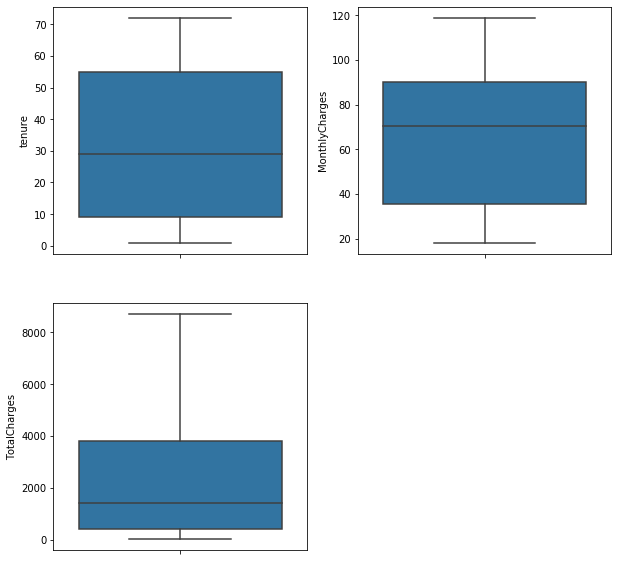

In [606]:
figure = plt.figure(figsize = (10,10))
for i in range(len(numCols)):
    plt.subplot(2,2,i+1)
    sns.boxplot(y=telecom[numCols[i]])
plt.show()

In [607]:
#We see that there are no outliers

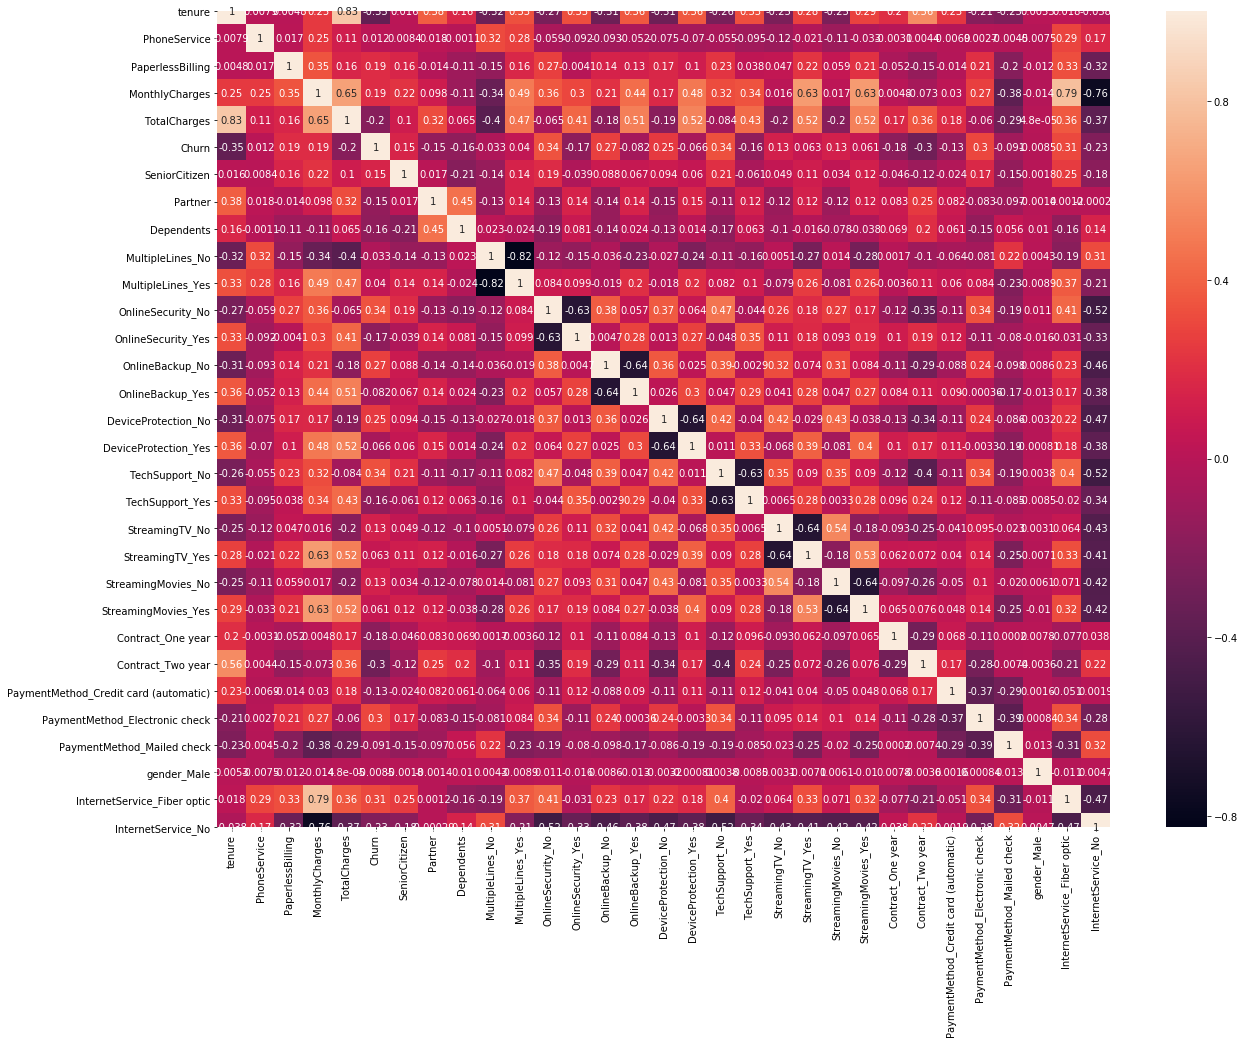

In [608]:
#checking corelations
plt.figure(figsize = (20,15))
sns.heatmap(telecom.corr(),annot = True)
plt.show()


In [609]:
## Test-Train split

In [610]:
from sklearn.model_selection import train_test_split

In [611]:
# Lets divide the dataframe into X and y
X = telecom.drop(['Churn'],axis=1)
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,1,0,1,29.85,29.85,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0
2,2,1,1,53.85,108.15,0,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0,0,0,1,0,0
4,2,1,1,70.70,151.65,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0


In [612]:
#dropping highly corelated features
X = X.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'], 1)

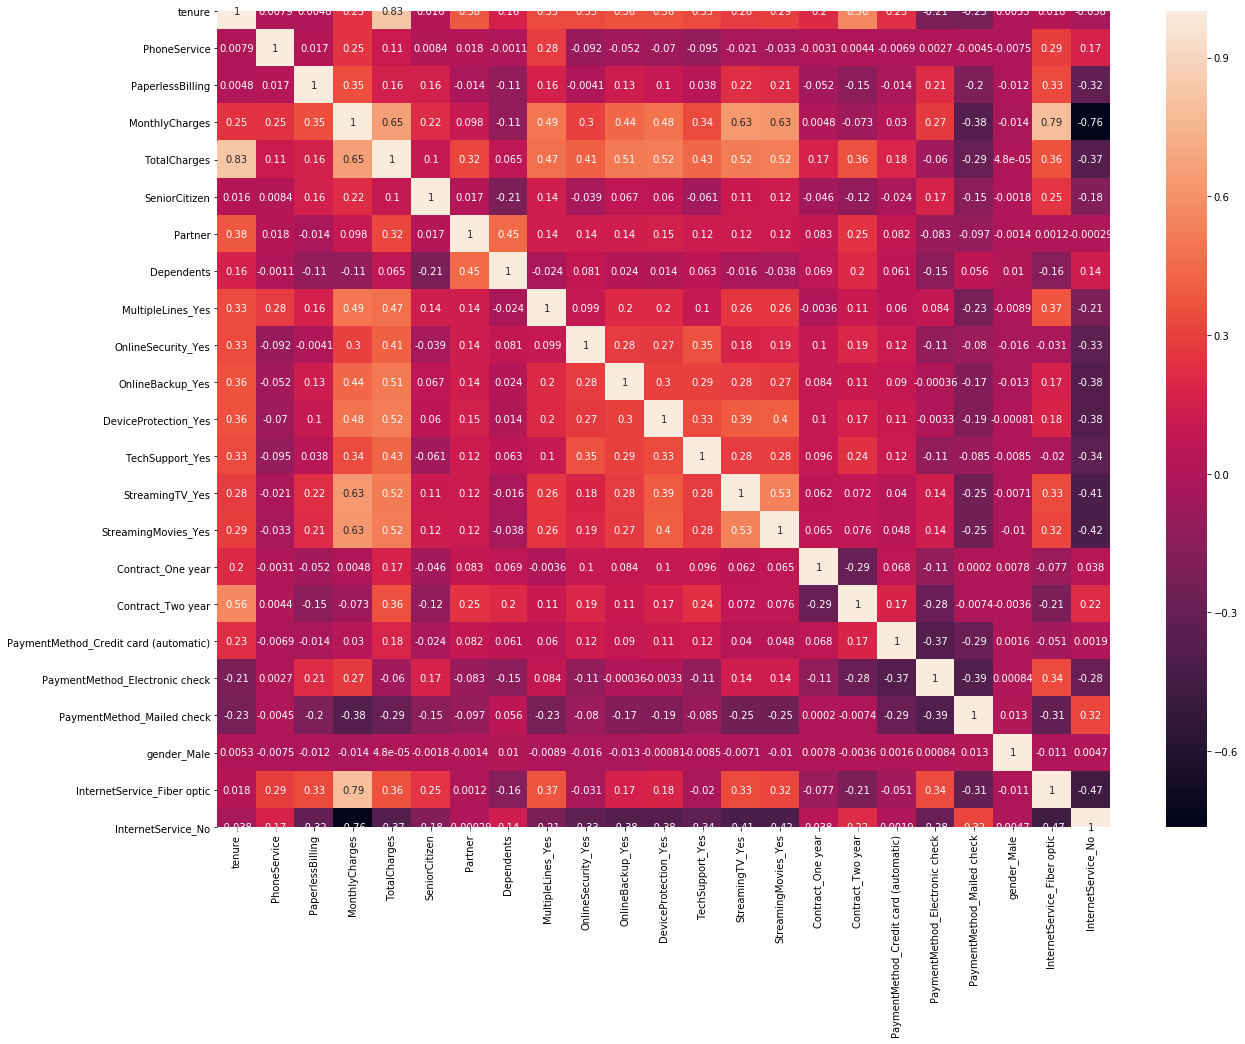

In [613]:
#checking the corealtion matrix again
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),annot = True)
plt.show()

In [614]:
y = telecom['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [615]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape)
print(X_test.shape)

(4922, 23)
(2110, 23)


### Feature Scaling

In [616]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[numCols] = scaler.fit_transform(X_train[numCols])
X_train[numCols].describe()

,tenure,MonthlyCharges,TotalCharges
count,4.922000e+03,4.922000e+03,4.922000e+03
mean,1.229793e-16,-2.053980e-16,1.221426e-16
std,1.000102e+00,1.000102e+00,1.000102e+00
min,-1.286319e+00,-1.548555e+00,-1.002408e+00
25%,-9.598159e-01,-9.665930e-01,-8.344722e-01
50%,-1.435582e-01,1.823658e-01,-3.877341e-01
75%,9.583897e-01,8.341630e-01,6.589888e-01
max,1.611396e+00,1.793569e+00,2.818847e+00


In [617]:
#checking the chrun rate
telecom['Churn'].mean()

0.26578498293515357

<b> customer churn rate is 26%

## Model Building

In [618]:
import statsmodels.api as sm

In [619]:
X_train_new = sm.add_constant(X_train)
logml = sm.GLM(y_train,X_train_new,family = sm.families.Binomial()).fit()
logml.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sun, 22 Mar 2020   Deviance:                       4009.4
Time:                        20:22:18   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
=========================================================================================================
"""

In [620]:
## Feature selection through RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
lr = LogisticRegression()
rfe = RFE(lr,15)
rfe = rfe.fit(X_train,y_train)
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False, False,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True])

In [621]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', True, 1),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', False, 6),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 8),
 ('Dependents', False, 4),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', True, 1),
 ('OnlineBackup_Yes', False, 2),
 ('DeviceProtection_Yes', False, 7),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', False, 5),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 3),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 9),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1)]

In [709]:
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Mailed check', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

RFE selected the above 15 columns for the model. Lets assess the model using these selected columns

In [693]:
X_train_sm = sm.add_constant(X_train[rfe_cols]) 
lr1 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.8
Date:                Wed, 25 Mar 2020   Deviance:                       4023.5
Time:                        20:20:53   Pearson chi2:                 6.22e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.0343      0.171     -6.053      0.000      -1.369      -0.699
tenure                                   -1.5386      0.184     -8.381      0.000      -1.898      -1.179
PhoneService                             -0.5231      0.161     -3.256      0.001      -0.838      -0.208
PaperlessBilling                          0.3397      0.090      3.789      0.000       0.164       0.515
TotalCharges                              0.7116      0.188      3.794      0.000       0.344       1.079
SeniorCitizen                             0.4294      0.100      4.312      0.000       0.234       0.625
MultipleLines_Yes                         0.2086      0.096      2.181      0.029       0.021       0.396
OnlineSecurity_Yes                       -0.4049      0.102     -3.968      0.000      -0.605      -0.205
TechSupport_Yes                          -0.3967      0.102     -3.902      0.000      -0.596      -0.197
StreamingTV_Yes                           0.2747      0.094      2.911      0.004       0.090       0.460
Contract_One year                        -0.6813      0.128     -5.334      0.000      -0.932      -0.431
Contract_Two year                        -1.2680      0.211     -6.011      0.000      -1.681      -0.855
PaymentMethod_Credit card (automatic)    -0.3775      0.113     -3.352      0.001      -0.598      -0.157
PaymentMethod_Mailed check               -0.3760      0.111     -3.389      0.001      -0.594      -0.159
InternetService_Fiber optic               0.7421      0.117      6.317      0.000       0.512       0.972
InternetService_No                       -0.9385      0.166     -5.650      0.000      -1.264      -0.613
=========================================================================================================
"""

In [694]:
#get the predicted values on train set
y_train_pred = lr1.predict(X_train_sm)
y_train_pred.head(10)

879     0.225111
5790    0.274893
6498    0.692126
880     0.504909
2784    0.645261
3874    0.417544
5387    0.420131
6623    0.809427
4465    0.223211
5364    0.512246
dtype: float64

The logistic model predict the probabilities for the target variable 'Churn'.
Lets convert the predicted values to an array and perform some analysis to check the accuracy of the model

In [695]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22511138, 0.27489289, 0.69212611, 0.50490896, 0.6452606 ,
       0.41754449, 0.42013086, 0.80942651, 0.2232105 , 0.51224637])

Next we will predict the value of `Churn` as 0 or 1 based on the probabilities predicted.

- First we will create a dataframe with actual Churn flag and the predicted probabilities
- Then we will create a new column `predicted` with 0 if predicted probability <= 0.5 else 1

In [696]:
y_train_pred_final = pd.DataFrame({'Actual_Churn':y_train.values,'Pred_Churn_prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Actual_Churn,Pred_Churn_prob,ID
0,0,0.225111,879
1,0,0.274893,5790
2,1,0.692126,6498
3,1,0.504909,880
4,1,0.645261,2784


In [697]:
y_train_pred_final['Predicted_Churn'] = y_train_pred_final.Pred_Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Churn_prob,ID,Predicted_Churn
0,0,0.225111,879,0
1,0,0.274893,5790,0
2,1,0.692126,6498,1
3,1,0.504909,880,1
4,1,0.645261,2784,1


We have the predicted values of `Churn`. Now lets see the accuracy of the model.
For the analysis done in Logistic Regression we use a Confusion Matrix which has the following values


                                   Predicted
                               not_churn    Churn
     
          Actual not_churn      TN           FP
          Actual    churn       FN           TP
          
   - TN = Total number of True Negatives  (Actual churn value of `0` predicted as `0`)
   - FP = Total number of False Positives (Actual churn value of `0` predicted as `1`)
   - FN = Total number of False Negatives (Actual churn value of `1` predicted as `0`)
   - TP = Total number of True Positives (Actual churn value of `1` predicted as `1`)
   
<b> Lets see the confusion matrix of our model and then check the accuracy
    
                 Accuracy = (TN+TP)/(TN+FP+FN+TP) = 3978/4922 = .08082

In [698]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Actual_Churn'],y_train_pred_final['Predicted_Churn'])
print(confusion_matrix)

[[3270  365]
 [ 579  708]]


In [699]:
metrics.accuracy_score(y_train_pred_final['Actual_Churn'],y_train_pred_final['Predicted_Churn'])

0.8082080455099553

In [700]:
### Checking Vif and eliminating features

In [701]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [702]:
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values,i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
1,PhoneService,8.86
3,TotalCharges,7.37
0,tenure,6.88
13,InternetService_Fiber optic,3.97
10,Contract_Two year,3.28
14,InternetService_No,3.25
2,PaperlessBilling,2.68
5,MultipleLines_Yes,2.53
8,StreamingTV_Yes,2.34
7,TechSupport_Yes,2.08


There are few variables with high Variance Inflation Factor. We know that high Vif represents high multicolinearity, i.e the variance can be vary well explained by other variables on the list. Lets drop high vif variables one by one and see how the model changes.

In [711]:
cols2 = rfe_cols.drop('PhoneService',1)
X_train_sm = sm.add_constant(X_train[cols2])
lr2 = sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2017.0
Date:                Wed, 25 Mar 2020   Deviance:                       4034.0
Time:                        20:24:33   Pearson chi2:                 5.94e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.3885      0.133    -10.437      0.000      -1.649      -1.128
tenure                                   -1.4138      0.179     -7.884      0.000      -1.765      -1.062
PaperlessBilling                          0.3425      0.089      3.829      0.000       0.167       0.518
TotalCharges                              0.5936      0.184      3.225      0.001       0.233       0.954
SeniorCitizen                             0.4457      0.099      4.486      0.000       0.251       0.640
MultipleLines_Yes                         0.1607      0.094      1.712      0.087      -0.023       0.345
OnlineSecurity_Yes                       -0.4094      0.102     -4.016      0.000      -0.609      -0.210
TechSupport_Yes                          -0.4085      0.101     -4.025      0.000      -0.607      -0.210
StreamingTV_Yes                           0.3077      0.094      3.277      0.001       0.124       0.492
Contract_One year                        -0.6905      0.128     -5.411      0.000      -0.941      -0.440
Contract_Two year                        -1.2646      0.211     -6.002      0.000      -1.678      -0.852
PaymentMethod_Credit card (automatic)    -0.3785      0.113     -3.363      0.001      -0.599      -0.158
PaymentMethod_Mailed check               -0.3769      0.111     -3.407      0.001      -0.594      -0.160
InternetService_Fiber optic               0.6241      0.111      5.645      0.000       0.407       0.841
InternetService_No                       -1.0940      0.158     -6.919      0.000      -1.404      -0.784
=========================================================================================================
"""

In [715]:
y_train_pred = lr2.predict(X_train_sm).values.reshape(-1)
y_train_pred_final['Pred_Churn_prob'] = y_train_pred
y_train_pred_final['Predicted_Churn'] = y_train_pred_final.Pred_Churn_prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Churn_prob,ID,Predicted_Churn
0,0,0.254032,879,0
1,0,0.224977,5790,0
2,1,0.693865,6498,1
3,1,0.510087,880,1
4,1,0.651724,2784,1


In [718]:
print(metrics.accuracy_score(y_train_pred_final.Actual_Churn,y_train_pred_final.Predicted_Churn))
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Actual_Churn'],y_train_pred_final['Predicted_Churn'])
print(confusion_matrix)
# positive predictive value 
print (TP / float(TP+FP))

0.8051605038602194
[[3261  374]
 [ 585  702]]
0.5983870967741935


In [722]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols2].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols2].values,i) for i in range(X_train[cols2].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,TotalCharges,7.30
0,tenure,6.79
9,Contract_Two year,3.16
12,InternetService_Fiber optic,2.94
13,InternetService_No,2.53
1,PaperlessBilling,2.52
7,StreamingTV_Yes,2.31
4,MultipleLines_Yes,2.27
6,TechSupport_Yes,2.00
8,Contract_One year,1.83


### Metrics other than accuracy

In [631]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [632]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5501165501165501

In [633]:
# Let us calculate specificity
TN / float(TN+FP)

0.8995873452544704

In [634]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.10041265474552957


In [635]:
# positive predictive value 
print (TP / float(TP+FP))

0.6598322460391426


In [636]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8495713172252534


## Plot the ROC (Receiver Operating Characteristic)

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [639]:
def draw_roc(actual_value,pred_prob):
    fpr,tpr,thresholds = metrics.roc_curve(actual_value,pred_prob,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual_value,pred_prob)
    plt.figure(figsize = (5,5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [642]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Actual_Churn,y_train_pred_final.Pred_Churn_prob,drop_intermediate = False)


array([1.84901191e+00, 8.49011909e-01, 8.48967659e-01, ...,
       9.99745475e-04, 9.94572510e-04, 9.76516087e-04])

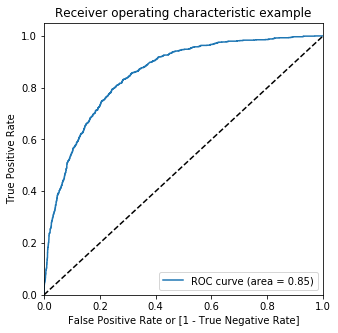

In [644]:
draw_roc(y_train_pred_final.Actual_Churn,y_train_pred_final.Pred_Churn_prob)

Remember, we used 0.5 value to decide on the predicted churn value based on the value of predicted probability.
Now this value was just arbitarily used.

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

Lets see how should we decide on the optimal cutoff point.

In [724]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Pred_Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Actual_Churn,Pred_Churn_prob,ID,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.254032,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.224977,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.693865,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.510087,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.651724,2784,1,1,1,1,1,1,1,1,0,0,0


In [725]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.261479,1.000000,0.000000
0.1,0.1,0.618854,0.941725,0.504539
0.2,0.2,0.718610,0.865579,0.666575
0.3,0.3,0.767168,0.778555,0.763136
0.4,0.4,0.795612,0.674437,0.838514
0.5,0.5,0.805161,0.545455,0.897111
0.6,0.6,0.800894,0.378399,0.950481
0.7,0.7,0.776514,0.189588,0.984319
0.8,0.8,0.746851,0.035742,0.998624
0.9,0.9,0.738521,0.000000,1.000000


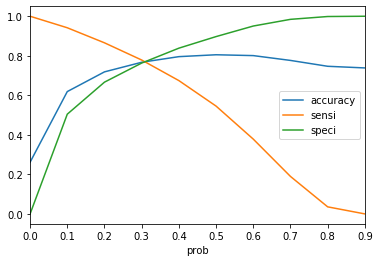

In [726]:
cutoff_df.plot(x='prob',y=['accuracy','sensi','speci'])
plt.show()

In [653]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [654]:
y_train_pred_final['Predicted_Churn'] = y_train_pred_final.Pred_Churn_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Actual_Churn,Pred_Churn_prob,ID,Predicted_Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.225111,879,0,1,1,1,0,0,0,0,0,0,0
1,0,0.274893,5790,0,1,1,1,0,0,0,0,0,0,0
2,1,0.692126,6498,1,1,1,1,1,1,1,1,0,0,0
3,1,0.504909,880,1,1,1,1,1,1,1,0,0,0,0
4,1,0.645261,2784,1,1,1,1,1,1,1,1,0,0,0


In [657]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Actual_Churn, y_train_pred_final.Predicted_Churn)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Actual_Churn, y_train_pred_final.Predicted_Churn )
confusion2

array([[2777,  858],
       [ 284, 1003]], dtype=int64)

In [658]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [662]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

# Positive predictive value 
print (TP / float(TP+FP))

# Negative predictive value
print (TN / float(TN+ FN))

 

Sensitivity: 0.7793317793317793
Specificity: 0.7639614855570839
0.2360385144429161
0.53895754970446
0.9072198627899379


## Making predictions on the test set

In [664]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])

In [666]:
X_test = X_test[rfe_cols]
X_test.head()

,tenure,PhoneService,PaperlessBilling,TotalCharges,SeniorCitizen,MultipleLines_Yes,OnlineSecurity_Yes,TechSupport_Yes,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,InternetService_Fiber optic,InternetService_No
942,-0.347623,1,1,-0.128378,0,0,0,0,0,0,0,1,0,1,0
3730,0.999203,1,1,1.600302,0,1,0,0,1,0,0,1,0,1,0
1761,1.040015,1,1,-0.343297,0,1,0,0,0,0,1,1,0,0,1
2283,-1.286319,1,1,-0.979170,0,0,0,0,0,0,0,0,1,1,0
1872,0.346196,1,0,-0.656086,0,0,0,0,0,0,1,0,0,0,1


In [667]:
X_test_sm = sm.add_constant(X_test)

In [669]:
y_test_pred = lr1.predict(X_test_sm)
y_test_pred[:10]

942     0.398978
3730    0.316800
1761    0.004331
2283    0.606035
1872    0.008464
1970    0.703318
2532    0.301284
1616    0.004247
2485    0.625488
5914    0.099822
dtype: float64

In [671]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
942,0.398978
3730,0.316800
1761,0.004331
2283,0.606035
1872,0.008464


In [674]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [675]:
# Let's see the head
y_pred_1.head()

,0
942,0.398978
3730,0.316800
1761,0.004331
2283,0.606035
1872,0.008464


In [676]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Churn,CustID,0
0,0,942,0.398978
1,1,3730,0.316800
2,0,1761,0.004331
3,1,2283,0.606035
4,0,1872,0.008464


In [679]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final[['CustID','Churn','Churn_Prob']]
# Let's see the head of y_pred_final
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.398978
1,3730,1,0.316800
2,1761,0,0.004331
3,2283,1,0.606035
4,1872,0,0.008464


In [680]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,CustID,Churn,Churn_Prob,final_predicted
0,942,0,0.398978,0
1,3730,1,0.316800,0
2,1761,0,0.004331,0
3,2283,1,0.606035,1
4,1872,0,0.008464,0


In [681]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion2

array([[1279,  249],
       [ 211,  371]], dtype=int64)

In [684]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: {}".format(TN / float(TN+FP)))

Sensitivity: 0.6374570446735395
Specificity: 0.8370418848167539
